 **Goal**: This notebook is designed to help you understand the fundamentals of Convolutional Neural Networks (CNNs).



 **Lab workflow**:
 - Follow the instruction in this notebook and complete **checkpoints???**.

 - By the end of the Lab, respond in **[]()** how many checkpoints you completed. It's not graded and designed to help you with your HWs.



 **Prepared by**:

 - Floride Tuyisenge, IDL TA S26, [ftuyisen@andrew.cmu.edu](mailto:ftuyisen@andrew.cmu.edu)

 - Yixiong Fang, IDL TA F25, [yixiongf@andrew.cmu.edu](mailto:yixiongf@andrew.cmu.edu)



 **Extra resources**: This Lab builds upon lectures 9 and 10.

 **Plan**



 In this exercise you will:

  - Review the core concepts behind CNNs (convolutions, filters, pooling, etc.)

  - Implement a simple convolution operation from scratch

  - Build and train a CNN using PyTorch on the CIFAR-10 dataset



 Let's get started!

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchsummary import summary
import matplotlib.pyplot as plt
import numpy as np


Input Image:
 [[1 2 3 0]
 [0 1 2 3]
 [3 0 1 2]
 [2 3 0 1]]
Kernel:
 [[ 1  0]
 [ 0 -1]]
Feature Map:
 [[-1. -2. -3.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [-3.  0.  0.  0.  3.]
 [-2.  0.  0.  0.  2.]
 [ 0.  2.  3.  0.  1.]]


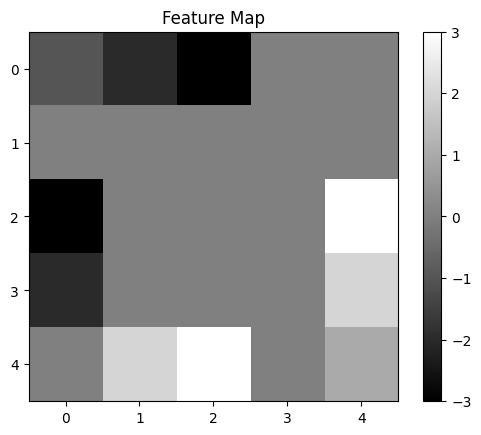

In [ ]:
def convolve2d(image, kernel, stride=1, padding=0):
    # Add zero padding to the input image if needed
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    kernel_height, kernel_width = kernel.shape
    img_height, img_width = image.shape

    # Calculate output dimensions
    out_height = (img_height - kernel_height) // stride + 1
    out_width = (img_width - kernel_width) // stride + 1

    # Initialize output feature map
    output = np.zeros((out_height, out_width))

    # Perform the convolution
    for y in range(0, out_height):
        for x in range(0, out_width):
            # Extract the region of interest
            region = image[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width]
            output[y, x] = np.sum(region * kernel)

    return output

# Example usage for the convolution function
if __name__ == '__main__':
    # Define a simple image and kernel
    image = np.array([
        [1, 2, 3, 0],
        [0, 1, 2, 3],
        [3, 0, 1, 2],
        [2, 3, 0, 1]
    ])

    kernel = np.array([
        [1, 0],
        [0, -1]
    ])

    # Convolve the kernel over the image
    feature_map = convolve2d(image, kernel, stride=1, padding=1)
    print("Input Image:\n", image)
    print("Kernel:\n", kernel)
    print("Feature Map:\n", feature_map)

    # Visualize the feature map
    plt.figure()
    plt.imshow(feature_map, cmap='gray')
    plt.title('Feature Map')
    plt.colorbar()
    plt.show()


In [ ]:
# --------------------------------------
# Checkpoint 1: Data Loading
# --------------------------------------
print("Checkpoint 1: Data Loading")

# Load the CIFAR-10 dataset
# TODO: Load cifar10 dataset using torchvision
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

print('Training dataset length:', len(train_dataset))
print('Test dataset length:', len(test_dataset))


Checkpoint 1: Data Loading


100%|██████████| 170M/170M [00:11<00:00, 15.3MB/s]


Training dataset length: 50000
Test dataset length: 10000


In [ ]:
# --------------------------------------
# Checkpoint 2: Data Preprocessing
# --------------------------------------
print("\nCheckpoint 2: Data Preprocessing")

# Define transforms for normalization
# TODO: Create transforms that convert images to tensors and normalize to [0, 1] range
# Hint 1: Pixel values are in the range of [0,255]
# Hint 2: You might want to use transforms.ToTensor() and transforms.Normalize()
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

# Apply transforms to datasets
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Verify normalization by checking a sample
sample_image, _ = train_dataset[0]
print('Min and max pixel values in sample image:', sample_image.min().item(), sample_image.max().item())



Checkpoint 2: Data Preprocessing
Min and max pixel values in sample image: -1.0 1.0



Checkpoint 3: Data Exploration


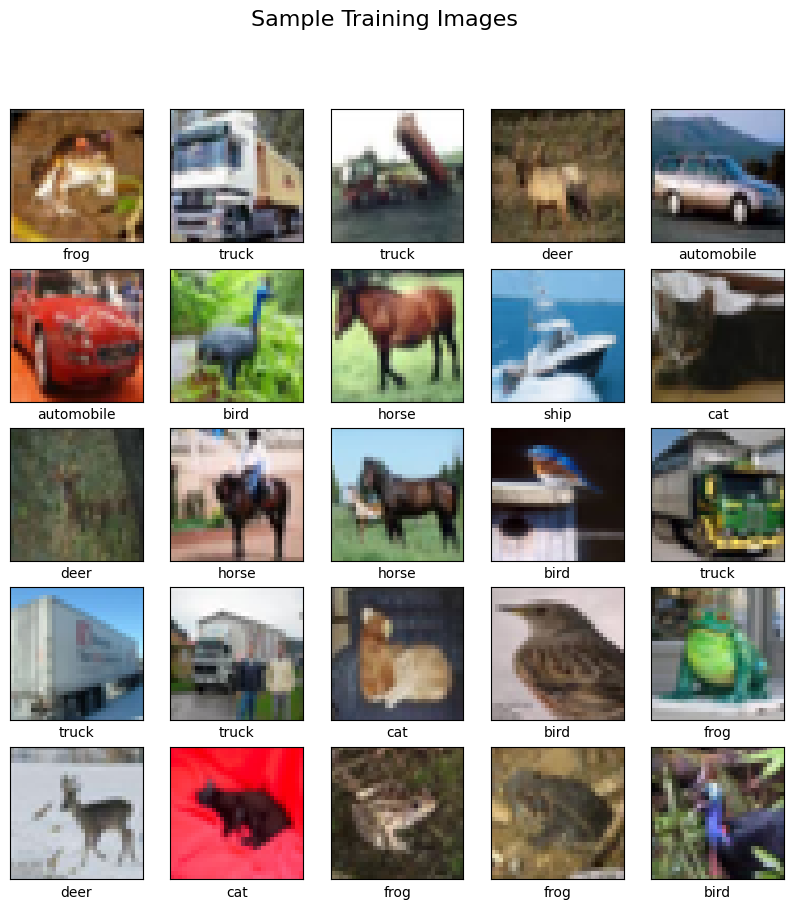

In [ ]:
# --------------------------------------
# Checkpoint 3: Data Exploration
# --------------------------------------
print("\nCheckpoint 3: Data Exploration")

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize a few sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image, label = train_dataset[i]
    # Convert from CHW to HWC format for matplotlib
    image = image.permute(1, 2, 0)
    # Denormalize for visualization (assuming normalization was applied)
    image = (image * 0.5) + 0.5  # Reverse normalization if using mean=0.5, std=0.5
    plt.imshow(image)
    plt.xlabel(class_names[label])
plt.suptitle("Sample Training Images", fontsize=16)
plt.show()


In [ ]:
# --------------------------------------
# Checkpoint 4: Build the CNN Model
# --------------------------------------
print("\nCheckpoint 4: Build the CNN Model")

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # TODO: First convolutional block
        # HINT: Use nn.Conv2d with a small number of filters (e.g., 32) and a 3x3 kernel.
        #       Use 'relu' activation and appropriate padding to maintain spatial dimensions.
        #       Follow this with nn.MaxPool2d to reduce the spatial dimensions.
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # TODO: Second convolutional block
        # HINT: Increase the number of filters (e.g., 64) for deeper feature extraction.
        #       Again, use a 3x3 kernel with appropriate padding.
        #       Follow with nn.MaxPool2d.
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # TODO: Third convolutional block
        # HINT: Further increase the filters (e.g., 128) to capture more complex features.
        #       Use the same setup: nn.Conv2d with 3x3 kernel and appropriate padding.
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()

        # Flatten and add Dense layers
        # Calculate the size after convolutions and pooling for the linear layer
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 8 * 8, 64)  # Adjust based on your architecture
        self.fc2 = nn.Linear(64, 10)  # 10 classes for CIFAR-10

    def forward(self, x):
        # TODO: Implement the forward pass
        # Apply conv1, activation, pool1
        # Apply conv2, activation, pool2
        # Apply conv3, activation
        # Flatten and apply fully connected layers



        # First block
        x = self.pool1(self.relu1(self.conv1(x)))

        # Second block
        x = self.pool2(self.relu2(self.conv2(x)))

        # Third block
        x = self.relu3(self.conv3(x))

        # Flatten and fully connected layers
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create the model
model = CNN()
print(model)


Checkpoint 4: Build the CNN Model
CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=8192, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
         MaxPool2d-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 64, 16, 16]          18,496
              ReLU-5           [-1, 64, 16, 16]               0
         MaxPool2d-6             [-1, 64, 8, 8]               0
            Conv2d-7            [-1, 128, 8, 8]          73,856
              ReLU-8            [-1, 128, 8, 8]               0
           Flatten-9                 [-1, 8192]               0
           Linear-10                   [-1, 64]         524,352
           Linear-11                   [-1, 10]             650
Total params: 618,250
Trainable params: 618,250
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/

In [ ]:
# --------------------------------------
# Checkpoint 5: Compile and Define Loss and Optimizer
# --------------------------------------
print("\nCheckpoint 5: Define Loss and Optimizer")

# TODO: Define loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(f"Using device: {device}")
print(f"Model parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")



Checkpoint 5: Define Loss and Optimizer
Using device: cpu
Model parameters: 618250


In [ ]:
# --------------------------------------
# Checkpoint 6: Train the Model
# --------------------------------------
print("\nCheckpoint 6: Train the Model")

# TODO: Implement training loop
# HINT: Use a for loop for epochs, iterate through train_loader
#       For each batch: get predictions, calculate loss, backpropagate, update weights
#       Remember to use optimizer.zero_grad(), loss.backward(), optimizer.step()
#       Optionally track training history for visualization

num_epochs = 1
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for batch_idx, (data, targets) in enumerate(train_loader):
        data, targets = data.to(device), targets.to(device)

        # TODO: Implement training step
        # Forward pass, loss calculation, backpropagation, optimizer step

        optimizer.zero_grad()
        logits = model(data)
        loss = loss_function(logits, targets)
        running_loss += loss
        loss.backward()
        optimizer.step()


        if batch_idx % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    # TODO: Calculate average loss for the epoch
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}] completed, Average Loss: {avg_loss:.4f}')



Checkpoint 6: Train the Model
Epoch [1/10], Step [1/391], Loss: 2.3092
Epoch [1/10], Step [101/391], Loss: 1.6481
Epoch [1/10], Step [201/391], Loss: 1.4228
Epoch [1/10], Step [301/391], Loss: 1.0853
Epoch [1/10] completed, Average Loss: 1.4693
Epoch [2/10], Step [1/391], Loss: 1.1524


KeyboardInterrupt: 

In [ ]:
# --------------------------------------
# Checkpoint 7: Evaluate the Model
# --------------------------------------
print("\nCheckpoint 7: Evaluate the Model")

# TODO: Implement evaluation
# HINT: Set model to eval mode, use torch.no_grad(), iterate through test_loader
#       Calculate accuracy by comparing predictions with true labels

model.eval()
correct = 0
total = 0
test_loss = 0.0

with torch.no_grad():
    for data, targets in test_loader:
        data, targets = data.to(device), targets.to(device)

        # TODO: Get predictions and calculate accuracy
        outputs = model(data)
        loss = loss_function(outputs, targets)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

test_accuracy = 100 * correct / total
print(f'\nTest Accuracy: {test_accuracy:.2f}%')
print(f'Test Loss: {test_loss/len(test_loader):.4f}')



Checkpoint 7: Evaluate the Model

Test Accuracy: 59.83%
Test Loss: 1.1200



Checkpoint 8: Visualize Intermediate Feature Maps


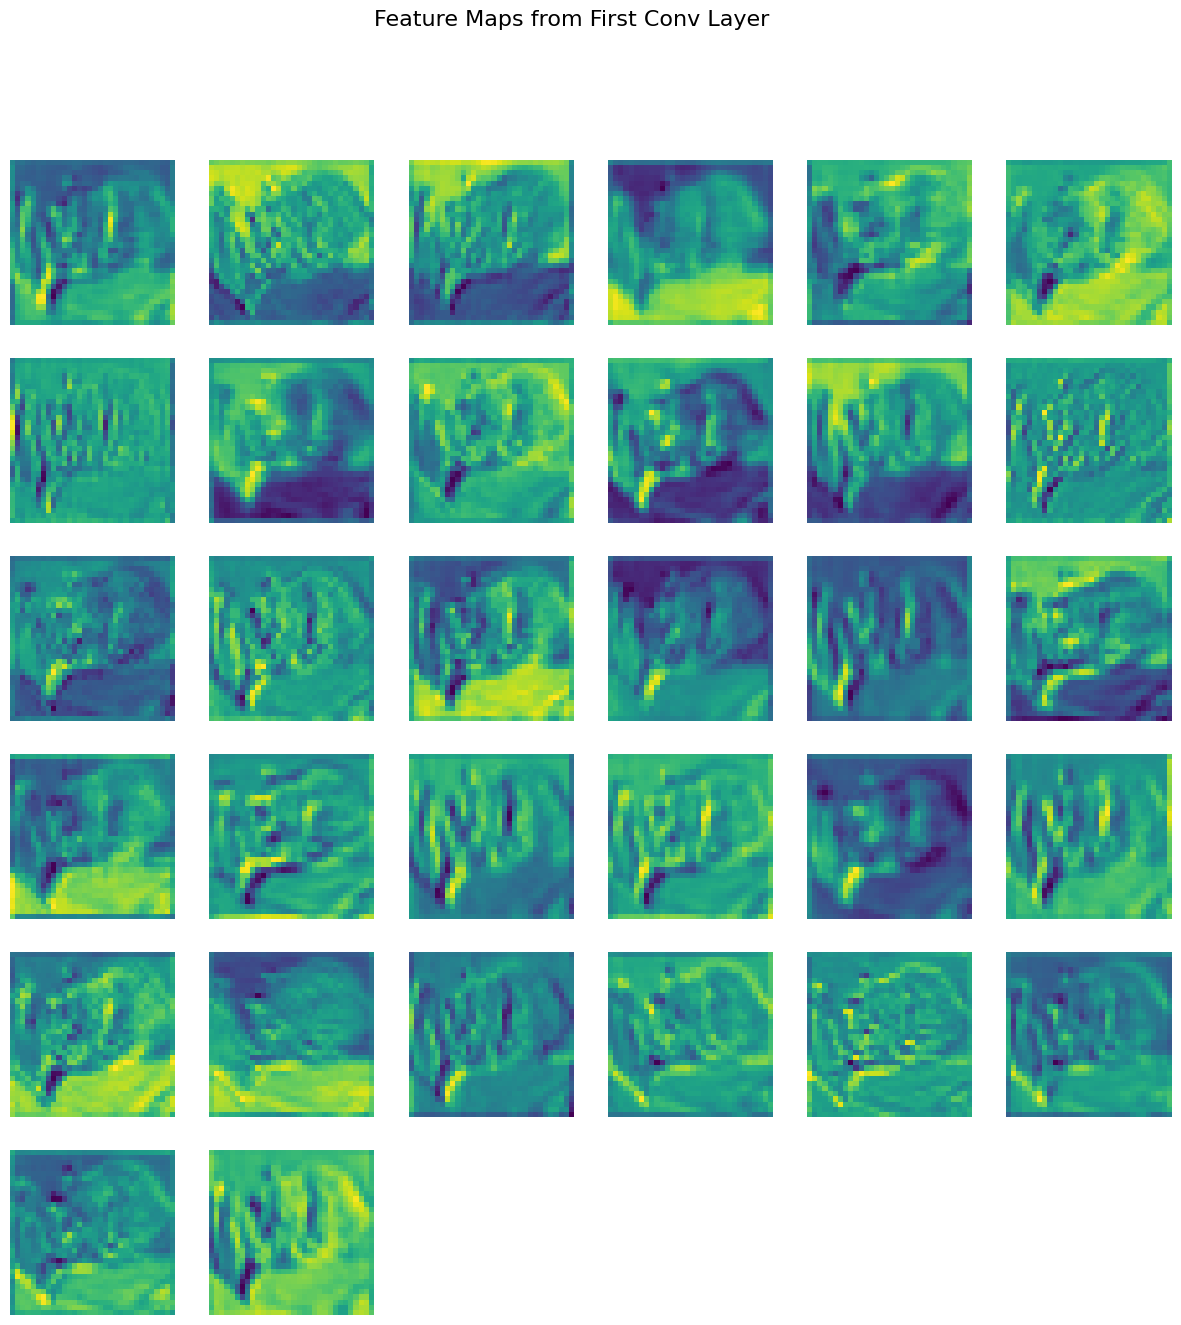

In [ ]:
# --------------------------------------
# Checkpoint 8: Visualize Intermediate Feature Maps
# --------------------------------------
print("\nCheckpoint 8: Visualize Intermediate Feature Maps")

# Get a sample image
dataiter = iter(test_loader)
sample_images, _ = next(dataiter)
sample_image = sample_images[0:1].to(device)

# Hook function to capture feature maps
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

# Register hooks for convolutional layers
model.conv1.register_forward_hook(get_activation('conv1'))

# Forward pass to get activations
model.eval()
with torch.no_grad():
    _ = model(sample_image)

# Visualize feature maps from the first convolutional layer
first_layer_activation = activation['conv1'][0].cpu()
num_filters = first_layer_activation.shape[0]

plt.figure(figsize=(15, 15))
for i in range(min(num_filters, 36)):  # Show up to 36 feature maps
    plt.subplot(6, 6, i + 1)
    plt.imshow(first_layer_activation[i], cmap='viridis')
    plt.axis('off')
plt.suptitle("Feature Maps from First Conv Layer", fontsize=16)
plt.show()



Checkpoint 9: Visualize Convolutional Filters


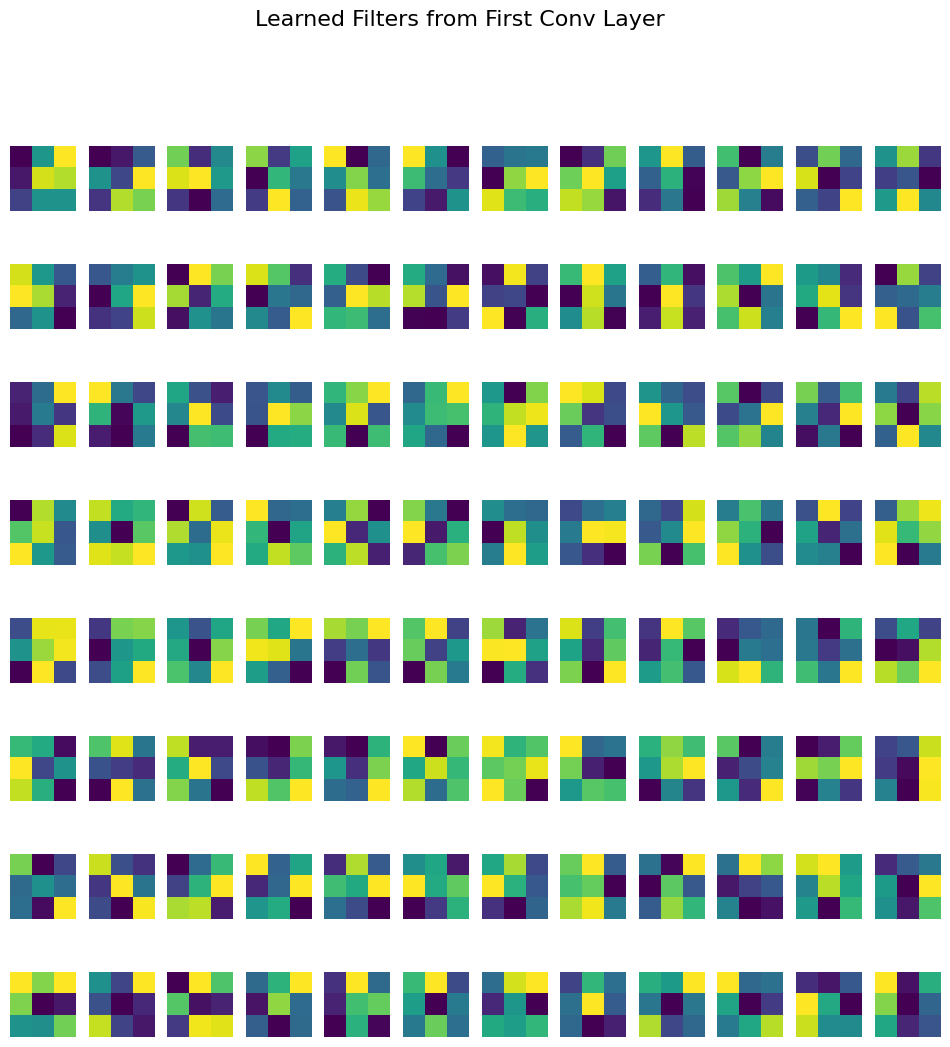

In [ ]:
# --------------------------------------
# Checkpoint 9: Visualize Convolutional Filters
# --------------------------------------
print("\nCheckpoint 9: Visualize Convolutional Filters")

# Get the filters from the first convolutional layer
first_conv_weights = model.conv1.weight.data.cpu().numpy()

# Normalize filter values to 0-1 for visualization
f_min, f_max = first_conv_weights.min(), first_conv_weights.max()
first_conv_weights = (first_conv_weights - f_min) / (f_max - f_min)

n_filters = first_conv_weights.shape[0]
plt.figure(figsize=(12, 12))

for i in range(min(n_filters, 32)):  # Show up to 32 filters
    for j in range(3):  # RGB channels
        ax = plt.subplot(8, 12, i * 3 + j + 1)
        plt.imshow(first_conv_weights[i, j], cmap='viridis')
        plt.axis('off')
plt.suptitle("Learned Filters from First Conv Layer", fontsize=16)
plt.show()


In [ ]:
# --------------------------------------
# Checkpoint 10: Conclusion and Further Exploration
# --------------------------------------
print("\nCheckpoint 10: Conclusion and Further Exploration")
print("You have built, trained, and evaluated a simple CNN on CIFAR-10.")
print("For further exploration, consider experimenting with:")
print("- Different network architectures and hyperparameters")
print("- Visualizing deeper layer activations")
print("- Applying data augmentation to boost model performance")
print("- Using transfer learning with pre-trained models from torchvision.models")



Checkpoint 10: Conclusion and Further Exploration
You have built, trained, and evaluated a simple CNN on CIFAR-10.
For further exploration, consider experimenting with:
- Different network architectures and hyperparameters
- Visualizing deeper layer activations
- Applying data augmentation to boost model performance
- Using transfer learning with pre-trained models from torchvision.models
